<a href="https://colab.research.google.com/github/kcl-bhi-is-01/ML_FHR_main/blob/main/ML_FHR_S06_L06_v01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here's a simple Python tutorial on feature extraction using Principal Component Analysis (PCA), one of the most common dimensionality reduction techniques. We'll use the iris dataset from sklearn.datasets for this example.

First, let's import the necessary libraries:

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Next, we load the iris dataset:

In [9]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
features = iris.feature_names

Before performing PCA, it's generally a good idea to scale the features so that they have a mean of 0 and a standard deviation of 1:

In [10]:
X = StandardScaler().fit_transform(X)

Now we can perform PCA. Let's keep two principal components:

In [11]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

We'll create a DataFrame with the principal components:

In [14]:
# Create a DataFrame with the principal components
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# Create a target DataFrame
targetDf = pd.DataFrame(data=y, columns=['target'])

# Map the target integers to their respective names
targets = np.unique(iris.target)
target_names = iris.target_names
mapping = {target: target_name for target, target_name in zip(targets, target_names)}
targetDf = targetDf.replace({'target': mapping})

# Concatenate the `principalDf` and `targetDf`
finalDf = pd.concat([principalDf, targetDf], axis = 1)

Now, let's plot the two principal components:

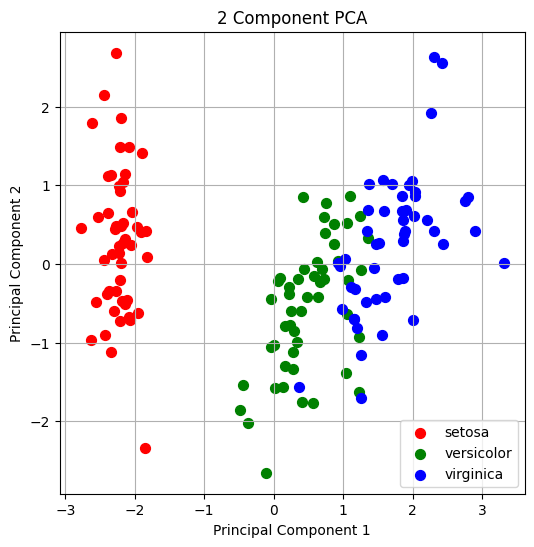

In [15]:
plt.figure(figsize=(6,6))
targets = ['setosa', 'versicolor', 'virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indicesToKeep = finalDf['target'] == target
    plt.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
                finalDf.loc[indicesToKeep, 'principal component 2'],
                c=color, s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2 Component PCA')
plt.legend(targets)
plt.grid()
plt.show()

This scatter plot shows the data projected onto the two principal components. Points that are close together correspond to samples that have similar features. This visualization can give you an idea of how well the data can be separated based on these two principal components.